In [29]:
# importing data
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# importing dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [52]:
# dfu = df[(df["job_title_short"] == "Data Scientist") & (df["job_country"] == "United States")].copy()
# dfu["salary_hour_avg"].plot(kind="hist", bins=30, edgecolor = "black")
# plt.xlim(0,150)
# ax = plt.gca()
# ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x)}"))

In [53]:
# dfd = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()

# dfd["num_skills"] = dfd["job_skills"].apply(lambda x: len(x) if isinstance(x, list) else 0)
# dfd["num_skills"].plot(kind="hist", bins=30, edgecolor="black")
# plt.xlim(0,20)
# plt.xticks(range(0, 21, 2))
# plt.show()

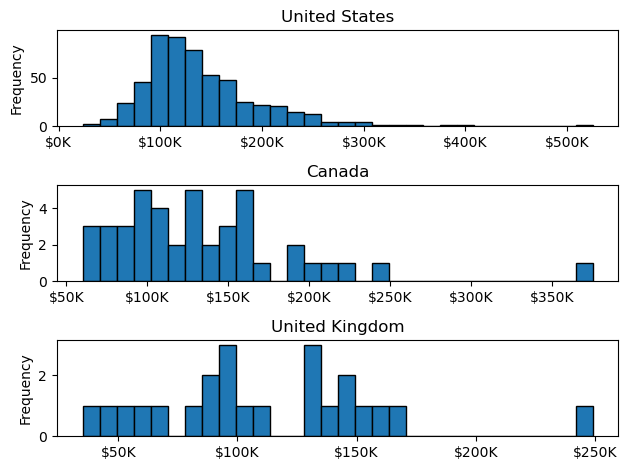

In [78]:
country_list = ["United States", "Canada", "United Kingdom"]

dfd = df[df["job_title_short"] == "Data Engineer"]
dfd = dfd.groupby(["job_country","salary_year_avg"]).size()
dfd = dfd.reset_index(name="count")
dfd

fig, ax = plt.subplots(3,1)
for i, jobs in enumerate(country_list):
    country_data = dfd[dfd["job_country"] == jobs]
    country_data["salary_year_avg"].plot(kind="hist", bins=30, edgecolor="black", ax=ax[i], title=jobs)
    ax[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))

plt.tight_layout()